In [1]:
# Read data from external file
import pandas as pd
dfmain = pd.read_csv("KF4train.csv")

In [2]:
dfmain.head()

,Timestamp,Age,Gender,Location,Occupation,Education_Level,Per_Serving,Total_Monthly,Factor_Influence,Often_Restaurant,Recommend_Traditional,Recommend_International,Preference
0,2024/11/15 6:27:30 PM GMT+8,21,Female,City,Student,Overseas Graduate,50.0,1000,Trending Meal,Daily,7.0,5.0,Local cuisine
1,2024/11/15 6:46:41 PM GMT+8,22,Male,Rural,Student,Local Graduate,10.0,50,Budget Friendly,Daily,10.0,8.0,Local cuisine
2,2024/11/15 7:10:02 PM GMT+8,22,Male,Suburban,Student,Local Graduate,15.0,150,Taste & Craving,Daily,9.0,9.0,Local cuisine
3,2024/11/15 7:37:50 PM GMT+8,49,Female,Rural,Employed (Non Executive-level),Local Graduate,50.0,600,Healthy Meal,Weekly,9.0,5.0,Local cuisine
4,2024/11/15 7:39:10 PM GMT+8,41,Female,Suburban,Employed (Executive-level),Local Graduate,20.0,500,Taste & Craving,Weekly,10.0,8.0,Local cuisine


In [3]:
dfmain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Timestamp                408 non-null    object 
 1   Age                      408 non-null    int64  
 2   Gender                   408 non-null    object 
 3   Location                 408 non-null    object 
 4   Occupation               408 non-null    object 
 5   Education_Level          406 non-null    object 
 6   Per_Serving              408 non-null    float64
 7   Total_Monthly            408 non-null    int64  
 8   Factor_Influence         408 non-null    object 
 9   Often_Restaurant         408 non-null    object 
 10  Recommend_Traditional    408 non-null    float64
 11  Recommend_International  408 non-null    float64
 12  Preference               408 non-null    object 
dtypes: float64(3), int64(2), object(8)
memory usage: 41.6+ KB


In [4]:
# To report missing data
dfmain.apply(lambda x: sum(x.isnull()),axis=0) 

Timestamp                  0
Age                        0
Gender                     0
Location                   0
Occupation                 0
Education_Level            2
Per_Serving                0
Total_Monthly              0
Factor_Influence           0
Often_Restaurant           0
Recommend_Traditional      0
Recommend_International    0
Preference                 0
dtype: int64

In [5]:
dfmain = dfmain[dfmain['Age'] != 0]
dfmain['Education_Level'].fillna(dfmain['Education_Level'].mode()[0], inplace=True)

C:\Users\anash\AppData\Local\Temp\ipykernel_3216\941313166.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfmain['Education_Level'].fillna(dfmain['Education_Level'].mode()[0], inplace=True)


In [6]:
# To report missing data
dfmain.apply(lambda x: sum(x.isnull()),axis=0) 

Timestamp                  0
Age                        0
Gender                     0
Location                   0
Occupation                 0
Education_Level            0
Per_Serving                0
Total_Monthly              0
Factor_Influence           0
Often_Restaurant           0
Recommend_Traditional      0
Recommend_International    0
Preference                 0
dtype: int64

In [7]:
dfmain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Timestamp                408 non-null    object 
 1   Age                      408 non-null    int64  
 2   Gender                   408 non-null    object 
 3   Location                 408 non-null    object 
 4   Occupation               408 non-null    object 
 5   Education_Level          408 non-null    object 
 6   Per_Serving              408 non-null    float64
 7   Total_Monthly            408 non-null    int64  
 8   Factor_Influence         408 non-null    object 
 9   Often_Restaurant         408 non-null    object 
 10  Recommend_Traditional    408 non-null    float64
 11  Recommend_International  408 non-null    float64
 12  Preference               408 non-null    object 
dtypes: float64(3), int64(2), object(8)
memory usage: 41.6+ KB


In [8]:
# Convert to numerical
# data transformation
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Location','Occupation','Education_Level','Per_Serving','Total_Monthly','Factor_Influence','Often_Restaurant','Preference']
le = LabelEncoder()
for i in var_mod:
    dfmain[i] = le.fit_transform(dfmain[i])

dfmain.head()

,Timestamp,Age,Gender,Location,Occupation,Education_Level,Per_Serving,Total_Monthly,Factor_Influence,Often_Restaurant,Recommend_Traditional,Recommend_International,Preference
0,2024/11/15 6:27:30 PM GMT+8,21,0,0,4,1,24,37,4,0,7.0,5.0,1
1,2024/11/15 6:46:41 PM GMT+8,22,1,1,4,0,8,2,0,0,10.0,8.0,1
2,2024/11/15 7:10:02 PM GMT+8,22,1,2,4,0,12,7,3,0,9.0,9.0,1
3,2024/11/15 7:37:50 PM GMT+8,49,0,1,1,0,24,28,1,3,9.0,5.0,1
4,2024/11/15 7:39:10 PM GMT+8,41,0,2,0,0,16,26,3,3,10.0,8.0,1


In [9]:
x = dfmain.drop(['Timestamp', 'Preference'], axis = 1)
y = dfmain.iloc[:, [12]]
x.head()

,Age,Gender,Location,Occupation,Education_Level,Per_Serving,Total_Monthly,Factor_Influence,Often_Restaurant,Recommend_Traditional,Recommend_International
0,21,0,0,4,1,24,37,4,0,7.0,5.0
1,22,1,1,4,0,8,2,0,0,10.0,8.0
2,22,1,2,4,0,12,7,3,0,9.0,9.0
3,49,0,1,1,0,24,28,1,3,9.0,5.0
4,41,0,2,0,0,16,26,3,3,10.0,8.0


In [10]:
# Convert dataframe to array
x = x.values
y = y.values
y = y.ravel()

In [11]:
# K-Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
ModelKita = KNeighborsClassifier(n_neighbors=7, p=1, weights = 'distance')
ModelKita.fit(x, y)
yPred = ModelKita.predict(x)

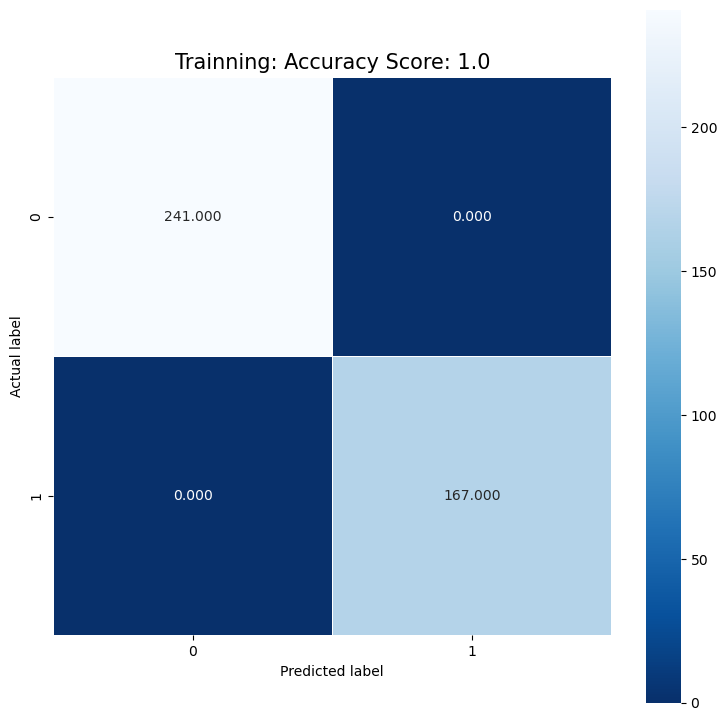

In [12]:
# Testing & performance analysis -Trainning data
import sklearn.metrics as skm
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(skm.confusion_matrix(y, yPred), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Trainning: Accuracy Score: {0}'.format(skm.accuracy_score(y, yPred))
plt.title(all_sample_title, size = 15);

In [13]:
# Read data from external file
import pandas as pd
dfmain2 = pd.read_csv("KF4test.csv")

In [14]:
dfmain2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Timestamp                102 non-null    object 
 1   Age                      102 non-null    int64  
 2   Gender                   102 non-null    object 
 3   Location                 102 non-null    object 
 4   Occupation               102 non-null    object 
 5   Education_Level          102 non-null    object 
 6   Per_Serving              102 non-null    float64
 7   Total_Monthly            102 non-null    int64  
 8   Factor_Influence         102 non-null    object 
 9   Often_Restaurant         102 non-null    object 
 10  Recommend_Traditional    102 non-null    float64
 11  Recommend_International  102 non-null    int64  
 12  Preference               102 non-null    object 
dtypes: float64(2), int64(3), object(8)
memory usage: 10.5+ KB


In [15]:
# Convert to numerical
# data transformation
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Location','Occupation','Education_Level','Per_Serving','Total_Monthly','Factor_Influence','Often_Restaurant','Preference']
le = LabelEncoder()
for i in var_mod:
    dfmain2[i] = le.fit_transform(dfmain2[i])


In [16]:
#Data slicing

x2 = dfmain2.drop(['Timestamp', 'Preference'], axis = 1)
y2 = dfmain2.iloc[:, [12]]
x2.head()


,Age,Gender,Location,Occupation,Education_Level,Per_Serving,Total_Monthly,Factor_Influence,Often_Restaurant,Recommend_Traditional,Recommend_International
0,21,0,2,3,3,2,7,1,1,10.0,10
1,22,0,2,3,3,5,4,0,1,8.0,6
2,18,0,0,3,0,5,6,0,1,7.0,5
3,20,0,2,3,0,5,6,3,1,7.0,7
4,22,0,0,3,0,1,11,3,2,7.0,6


In [38]:
# Convert dataframe to array
x2 = x2.values
y2 = y2.values
y2 = y2.ravel()

yPred2 = ModelKita.predict(x2)

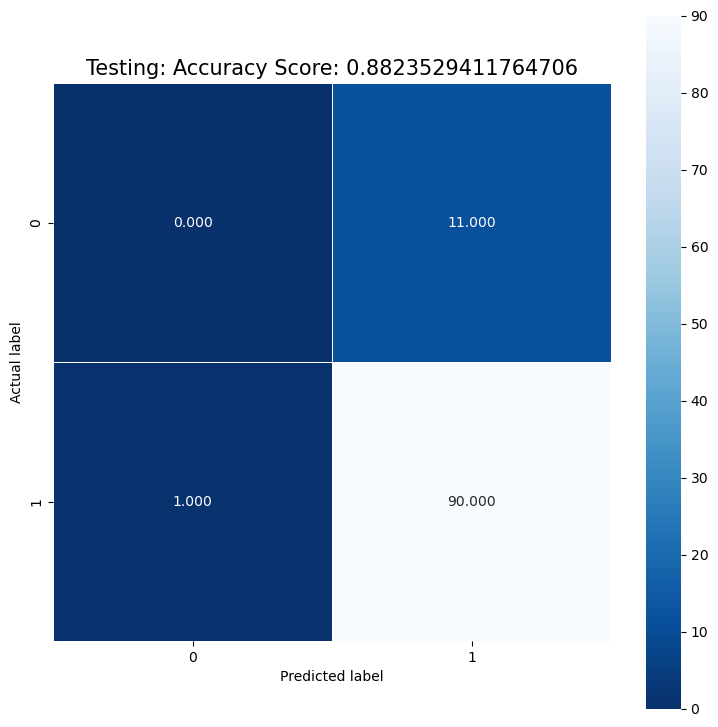

In [39]:
# Testing & performance analysis -Testing data
import sklearn.metrics as skm
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(skm.confusion_matrix(y2, yPred2), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Testing: Accuracy Score: {0}'.format(skm.accuracy_score(y2, yPred2))
plt.title(all_sample_title, size = 15);

In [40]:
dfmain2.head()

,Timestamp,Age,Gender,Location,Occupation,Education_Level,Per_Serving,Total_Monthly,Factor_Influence,Often_Restaurant,Recommend_Traditional,Recommend_International,Preference
0,2024/11/21 12:15:36 AM GMT+8,21,0,2,3,3,2,7,1,1,10.0,10,1
1,2024/11/21 12:18:27 AM GMT+8,22,0,2,3,3,5,4,0,1,8.0,6,1
2,2024/11/21 12:19:06 AM GMT+8,18,0,0,3,0,5,6,0,1,7.0,5,0
3,2024/11/21 12:19:21 AM GMT+8,20,0,2,3,0,5,6,3,1,7.0,7,1
4,2024/11/21 12:20:07 AM GMT+8,22,0,0,3,0,1,11,3,2,7.0,6,1


In [41]:
newData = [[21,	0,	2,	3,	3,	2,	7,	1,	1,	10.0,	10]]

predictionResult = ModelKita.predict(newData)

if( predictionResult == 1):
    print("Prediction result = Local")
else:
    print("Prediction result = International")

Prediction result = Local


In [42]:
newData = [[21,	0,	2,	3,	3,	2,	50,	1,	1,	10,	10]]

predictionResult = ModelKita.predict(newData)

if( predictionResult == 1):
    print("Prediction result = Local")
else:
    print("Prediction result = International")

Prediction result = International
